# Homework 3

## Question 1

- Let $X_1$ be a positive valued random variable and let $X_2:=\frac{1}{X_1}$ and $X_3:=e^{-X_1}$.
- Clearly, $(X_1,X_2)$ and $(X_1,X_3)$ are countercomonotonic, while $(X_2,X_3)$ is comonotonic.
- Let $C$ be the copula of $(X_1,X_2,X_3)$.
- Answer the following questions:
    - Explain why $C$ is also the copula of $(X_1,-X_1,-X_1)$
    - Now show that $C(u_1,u_2,u_3)=\max\{\min\{u_2,u_3\}+u_1-1,0\}$

### Solution
- The reason why $C$ is also the copula of $(X_1,-X_1,-X_1)$ is that the components $(X_1,-X_1,-X_1)$ are monotonic transformations of $(X_1,X_2,X_3)$
- Equivalently, we need to find the copula for $(X_1,-X_1,-X_1)$. That is, denoting by $C_{1,2}$ the copula of $(X_1,-X_1)$, $C$ must satisfy
$$\begin{align*}
C(u_1,u_2,u_3) & = \mathbb{P}(X_1\leq u_1, -X_1\leq u_2, -X_1 \leq u_3)\\
& = \mathbb{P}(X_1\leq u_1, -X_1\leq \min\{u_2, u_3))\\
& = C_{1,2}(u_1,\min\{u_2,u_3\})
\end{align*}$$
- Since $(X_1,-X_1)$ are countercomonotonic, it must be the case that $C_{1,2}(u_1,u_2)=\max\{u_1+u_2-1,0\}$, which gives the result.

## Question 2

- Let $X_1$ and $X_2$ be two random variables such that $\log(X_1) \sim \mathcal{N}(0, 1)$ and $\log(X_2) \sim \mathcal{N}(0, \sigma^2)$ where $\sigma > 0$.
    - Explain why the log-normally-distributed random variables, $X_1$ and $X_2$, are not of the same type when $\sigma\neq 1$.
    - Let $\rho_{\min}$ and $\rho_{\max}$ be the minimum and maximum possible correlations, respectively, of $X_1$ and $X_2$. Explain why it must be the case that $\rho_{\min} > −1$ and $\rho_{\max} < 1$.
    - Let $Z \sim \mathcal{N}(0, 1)$ and show that if $(X_1, X_2) = (e^Z,e^{\sigma Z})$ then $X_1$ and $X_2$ are comonotonic. Similarly show that if $(X_1, X_2) = (e^Z,e^{−\sigma Z})$ then $X_1$ and $X_2$ are countermonotonic.
    - Now calculate $\rho_{\min}$ and $\rho_{\max}$ as a function of $\sigma$. Plot both of these quantities as a function of $\sigma$ in the interval $\sigma\in [.1, 5]$. What do you conclude?

### Solution

- This is true because the lognormal distribution is not close under affine transformations, and so $X_1$ and $X_2$ are of the same type if and only if $X_1=X_2$. Specifically, suppose there are $a>0$ and $b\in \mathbb{R}$ such that $X_1=aX_2+b$. Then, for every $u\in\mathbb{R}$
$$\begin{align*}
\Phi(u) & = \mathbb{P}(X_1\leq e^u)\\
& = \mathbb{P}(aX_2+b\leq e^u)\\
& = \mathbb{P}(\log(X_2)/\sigma\leq \log(e^u/a-b)/\sigma)\\
& = \Phi(\log(2^u/a-b)/\sigma)\\
\Longleftrightarrow u & = \log(e^u/a-b)/\sigma\\
\Longleftrightarrow \sigma & = 1, \ a=1, \ b=0.
\end{align*}$$
- $\rho_{\max}=1$ if and only if $X_1$ and $X_2$ are of the same type, and as shown above this is possible if and only if $X_1=X_2$. On the other hand, $\rho_{\min}=1$ if and only if $X_1$ and $-X_2$ are of the same type, but this is impossible, since both $X_1$ and $X_2$ are nonnegative.
- This follows from the fact that the copula of $(e^Z,e^{\sigma Z})$ is the same as that of $(Z,Z)$, which must then be the comonotonic copula. Similarly, the copula of $(e^Z,e^{-\sigma Z})$ is the same as that for $(Z,-Z)$, so it must be the countermonotonic copula.
- Using the formulas for mean and variance of a lognormal distribution, we easily obtain
$$\begin{align*}
\rho_{\max} & = \frac{Cov(e^{Z},e^{\sigma Z})}{\sqrt{V(e^Z)Ve^{\sigma Z}}}\\
& = \frac{\mathbb{E}[e^{(\sigma+1)Z}]-\mathbb{E}[e^{\sigma Z}]\mathbb{E}[e^{Z}]}{\sqrt{(e-1)e(e^{\sigma^2}-1)e^{\sigma^2}}}\\
& = \frac{e^{(\sigma+1)^2/2}-e^{\sigma^2/2}e^{1/2}}{\sqrt{(e-1)(e^{\sigma^2}-1)e^{\sigma^2+1}}}\\
& = \frac{e^{(\sigma^2+1)/2}(e^{\sigma}-1)}{\sqrt{(e-1)(e^{\sigma^2}-1)}e^{(\sigma^2+1)/2}}\\
& = \frac{e^{\sigma}-1}{\sqrt{(e-1)(e^{\sigma^2}-1)}}\\
\rho_{\min} & = \frac{Cov(e^{Z},e^{-\sigma Z})}{\sqrt{V(e^Z)Ve^{-\sigma Z}}}\\
& = \frac{e^{-\sigma}-1}{\sqrt{(e-1)(e^{\sigma^2}-1)}}
\end{align*}$$

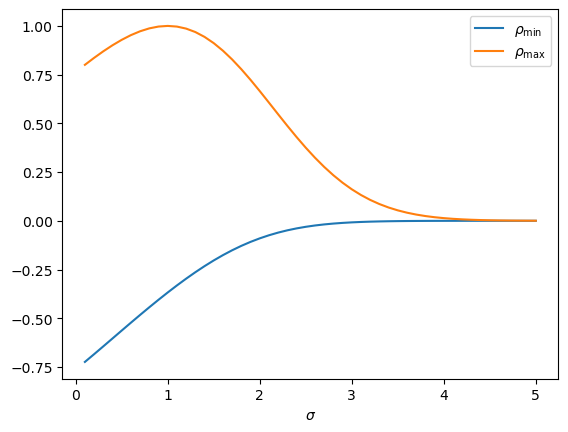

In [4]:
import numpy as np
import matplotlib.pyplot as plt

sig = np.linspace(0.1,5,50)
den = np.sqrt( (np.exp(1)-1) * (np.exp(sig**2)-1) )
rhomin = (np.exp(-sig)-1)/den
rhomax = (np.exp(sig)-1)/den

ax = plt.gca()  # or any other way to get an axis object
ax.plot(sig, rhomin, label=r'$\rho_{\min}$')
ax.plot(sig, rhomax, label=r'$\rho_{\max}$')
plt.xlabel(r'$\sigma$')
ax.legend()

- The plot above shows that, as expected, $\rho_{\max}$ is maximal for $\sigma=1$, and it is then decreasing to zero as $\sigma\rightarrow \infty$.
- Similarly, $\rho_{\min}$ is minimal as $\sigma\rightarrow 0$, and it is then increasing to zero as $\sigma\rightarrow \infty$.

## Question 3

Write a function to plot the density of (i) the bivariate Gaussian copula and (ii) the bivariate t-copula for $\nu = 4$ degrees-of-freedom. Your function should take the correlation, $\rho$, as an input. Run your function for different values of $\rho$. What do you notice?


### Solution

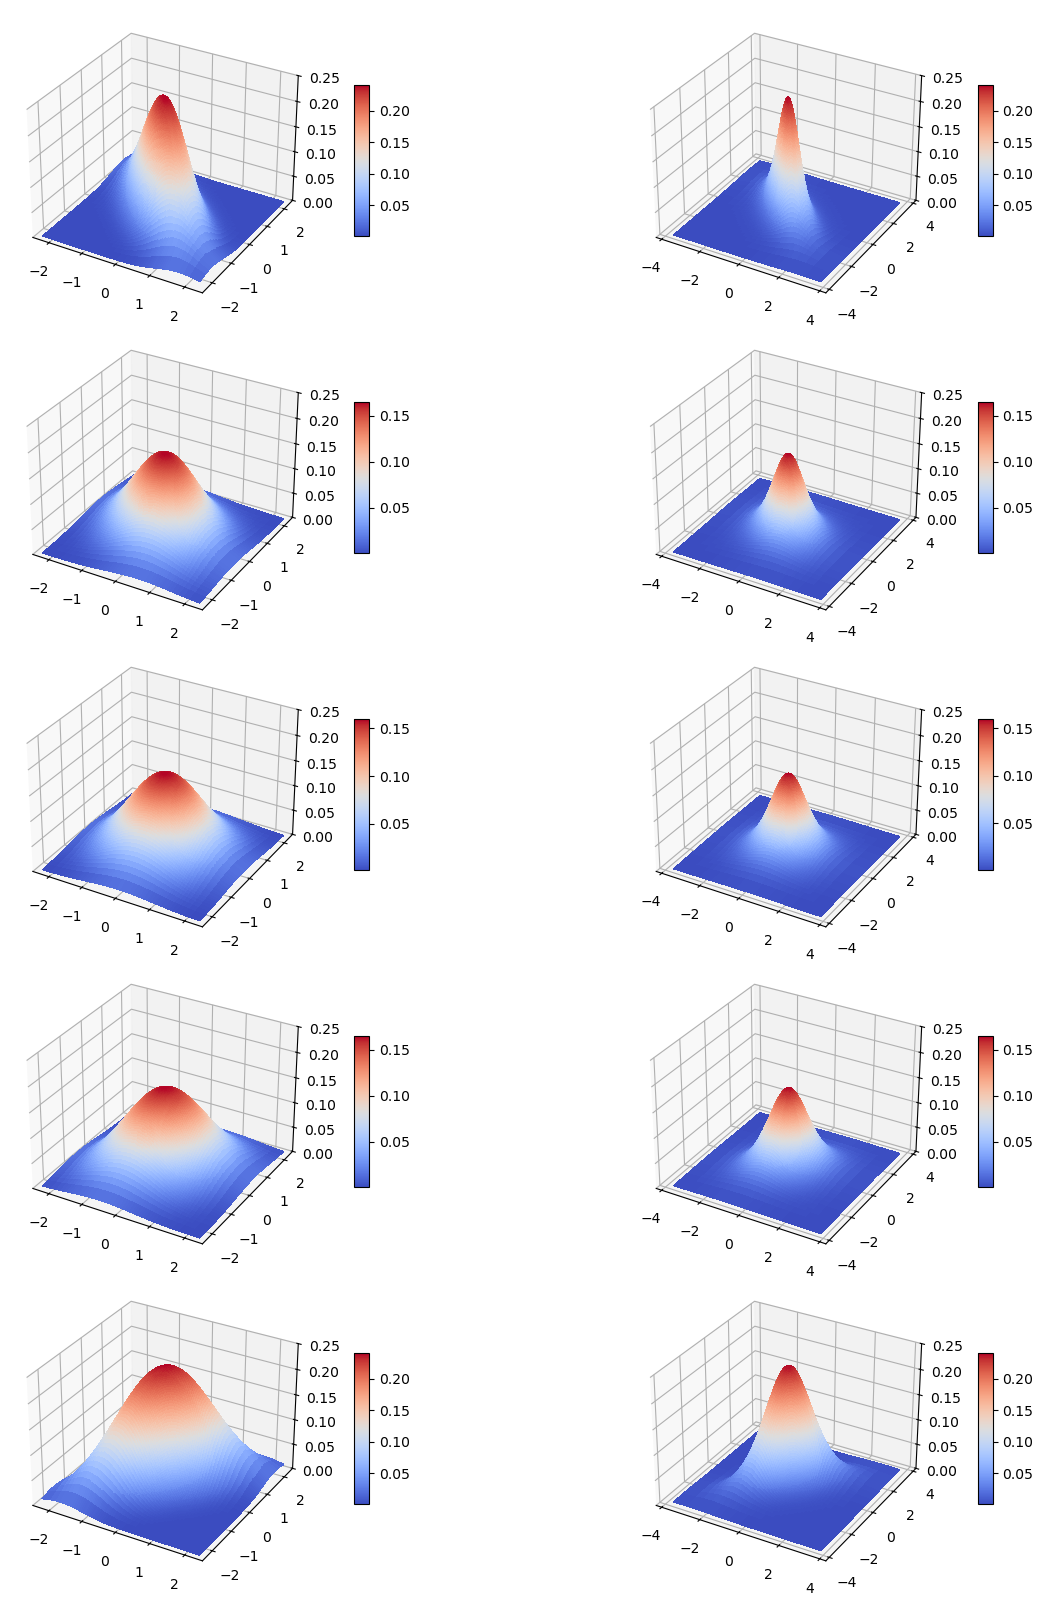

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data

# Correlation
rho = [-0.75,-0.25,0,0.25,0.75]
lim = 2.5
# set up a figure twice as tall as it is wide
fig, axs = plt.subplots(len(rho), 2, subplot_kw=dict(projection='3d'),figsize=plt.figaspect(4))
fig.set_figwidth(15)
# =================
# Bivariate copulas
# =================

for i in range(len(rho)):
    
    # Gaussian bivariate copula
    U1 = np.arange(0.01, 0.999, 0.01)
    U2 = np.arange(0.01, 0.999, 0.01)
    X = st.norm.ppf(U1)
    Y = st.norm.ppf(U2)
    X, Y = np.meshgrid(X, Y)
    U1, U2 = np.meshgrid(U1, U2)
    rv = st.multivariate_normal([0, 0], [[1, rho[i]], [rho[i], 1]])
    Z = rv.pdf(np.dstack((X, Y)))
    surf = axs[i,0].plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False)
    axs[i,0].set_xlim(-lim, lim)
    axs[i,0].set_ylim(-lim, lim)
    axs[i,0].set_zlim(0, 0.25)
    fig.colorbar(surf, shrink=0.5, aspect=10)

    # Student bivariate copula
    U1 = np.arange(0.01, 0.999, 0.01)
    U2 = np.arange(0.01, 0.999, 0.01)
    X = st.t.ppf(U1,df=4)
    Y = st.t.ppf(U2,df=4)
    X, Y = np.meshgrid(X, Y)
    U1, U2 = np.meshgrid(U1, U2)
    rv = st.multivariate_t([0, 0], [[1, rho[i]], [rho[i], 1]], df = 4)
    Z = rv.pdf(np.dstack((X, Y)))
    surf = axs[i,1].plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False)
    axs[i,0].set_xlim(-lim, lim)
    axs[i,0].set_ylim(-lim, lim)
    axs[i,1].set_zlim(0, 0.25)
    fig.colorbar(surf, shrink=0.5, aspect=10)

plt.tight_layout()
plt.show()

- Observations:
    - As $\rho$ increases from $-1$ to $1$, both densities become more and more concentrated on the line $y=x$, from being concentrated on the line $y=-x$.
    - The student's copula implies a higher correlation between the uniform marginals for a given value of $\rho$.

## Question 4

- Write a function that simulates $n$ samples of a bivariate t distribution with $\nu$ degrees of freedom, mean vector $\mu$ and correlation $\rho$ and then calculate estimates of $\rho$ using (i) the usual Pearson correlation coefficient and (ii) Kendall’s $\tau$.
- Write another function that calls your function from part (a) 2000 times with $n = 60$, $\rho = .5$ and $\mu = 0$, and then create two plots corresponding to the estimates produced by methods (i) and (ii) respectively. What estimator do you prefer?

### Solution

In [236]:
def PearsonVSKendall(rho: float, n: int, mu: np.ndarray, df = int ) -> np.ndarray:
    P = [[1, rho], [rho, 1]]
    X = st.multivariate_t.rvs(loc=mu, shape=P, df=df, size=n, random_state=None)
    Xtil = st.multivariate_t.rvs(loc=mu, shape=P, df=df, size=n, random_state=None)

    rho_es = np.corrcoef(X[:,0],X[:,1])
    kendall_es = np.sin(np.pi*np.mean(np.sign( (X[:,0]-Xtil[:,0])*(X[:,1]-Xtil[:,1]) ))/2)
    return np.array([rho_es[0,1],kendall_es])

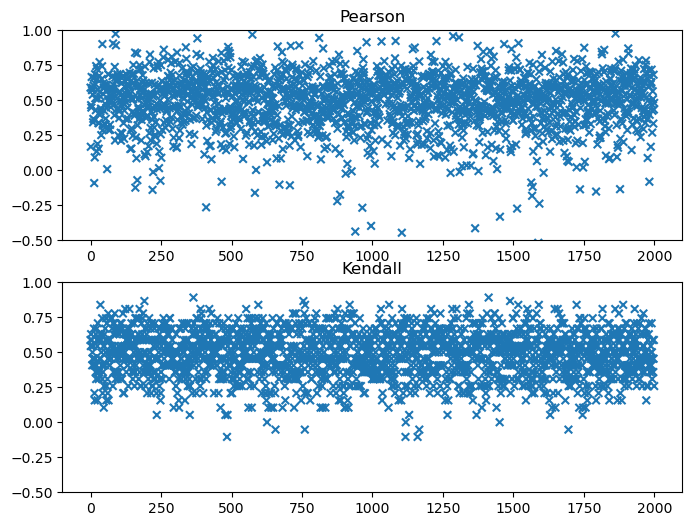

In [252]:
N = 2000

def PlotPVSK(N = 2000) -> None:
    es = []
    rho = 0.5
    n = 60
    mu = [0,0]
    df = 3
    lim_u = 1
    lim_l = -0.5
    # Fixing random state for reproducibility
    np.random.seed(10)

    for i in range(N):
        es.append(PearsonVSKendall(rho = rho, n = n, mu = mu, df = df))

    fig, axs = plt.subplots(2, 1)

    area = [30 for n in range(N)]  # 0 to 15 point radii

    axs[0].scatter(np.array(range(N)), np.array(es)[:,0], s = area, alpha=1, marker='x')
    axs[0].set_title('Pearson')
    axs[0].set_ylim(lim_l, lim_u)
    axs[1].scatter(np.array(range(N)), np.array(es)[:,1], s = area, alpha=1, marker='x')
    axs[1].set_title('Kendall')
    axs[1].set_ylim(lim_l, lim_u)

    fig.set_figwidth(8)
    fig.set_figheight(6)
    plt.show()

PlotPVSK(N)



- Clearly, the estimate of $\rho$ based on Kendall's $\tau$ outperform the classical estimate.

## Question 5

- Let $S_1, ... , S_N$ denote the time $T$ prices of $N$ securities all of which have been normalized so that their time $t = 0$ price is $1$. Suppose we wish to price a particular basket option that expires at time $T$ with a payoff of $$\begin{align*}\max\{0, S(i) − K\}\end{align*}$$ where $S(i)$ is the $i$-th largest security price at time $T$. For example if we take $i = 1$ then the option is a call-on-the-max option whereas if $i = 2$, then the option is a call-on-the-second max. Assume that the risk-neutral distribution of each $S_j$ satisfies $$\begin{align*}\log(S_j) \sim\mathcal{N}\left(\left(r − \frac{\sigma_j^2}{2}\right)T,\sigma_j^2T\right)\end{align*}$$ where $r$ is the risk-free  nterest rate. Thus, each stock is non-dividend paying and follows a geometric-Brownian motion under the risk-neutral probability measure. (In practice, we would not use a log-normal distribution for the $S_j$’s but as we want to focus on the dependency structure, that assumption is fine here.)
    - (a) Write a Monte-Carlo simulation to price the basket option with $T = 1$ year, $i = 1$, $r = 2\%$, $N = 10$ and $\sigma_1 = ... = \sigma_N = .3$. You should assume that the risk-neutral dependency structure is given by a Gaussian copula with an equicorrelation matrix with $\rho = .5$. Your code should output the option price for values of $K = 1.6, 1.65, 1.7, . . . , 2$. (In order to make your Monte-Carlo efficient you might consider using variance reduction techniques.)
    - (b) Repeat part (a) but now assume that the dependency structure is given by a multivariate t copula with 4 degrees-of-freedom and the same equicorrelation matrix. 
    - (c) Repeat parts (a) and (b) but now set $i = 2$. What, if anything do you notice? (You should ensure that your statistical error is sufficiently small as to render comparisons between
the prices under the two dependence structures possible.)


### Solution

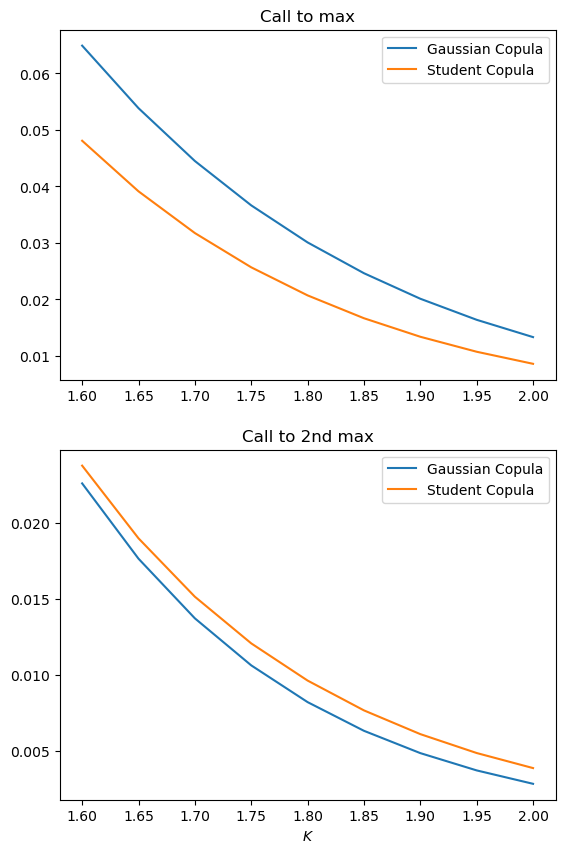

In [396]:
## Data
N = 10
sig = 0.3
rho = 0.5
df = 4
r = 0.02
T = 1
i = 1
K = np.linspace(1.6,2,N-1)

Nsim = 500000

mu = ((r-sig**2/2)*T)*np.ones(N) # common drift

def create_equicorrelation_matrix(N, rho):
    """Creates an n x n equicorrelation matrix with correlation coefficient rho."""
    Sigma = np.full((N, N), rho) # Create a matrix filled with rho
    np.fill_diagonal(Sigma, 1) # Set the diagonal elements to 1
    return Sigma
Sigma = create_equicorrelation_matrix(N = N, rho = rho) # Correlation matrix for copulas

# prices will be stored in these lists
Pnorm = []
Pstud = []
Pnorm2 = []
Pstud2 = []

## ================
## Call to Max
## ================

## Gaussian
# First, simulate the Gaussian copula
rv = st.multivariate_normal(np.zeros(N), Sigma)
X = rv.rvs(Nsim)
U = st.norm.cdf(X)
# Next transform the components and compute the max for each sample
S = np.exp(st.norm.ppf(U,loc = 0, scale = sig*np.sqrt(T)))*np.exp(mu)
S1 = np.max(S,axis=1)
# Price of the basket option
for k in K:
    Pnorm.append( np.mean( np.exp(-r*T) * np.where( S1-k >0, S1-k, 0) ) )

## Student
# First, simulate the student copula
rv = st.multivariate_normal(np.zeros(N), Sigma)
g = np.tile(np.random.gamma(df / 2, 2 / df, Nsim), (N, 1)).T
X = rv.rvs(Nsim)/np.sqrt(g)
U = st.t.cdf(X,df=df)
# Next transform the components and compute the max for each sample
S = np.exp( st.norm.ppf(U, loc = 0, scale = sig*np.sqrt(T)) ) * np.exp(mu)
S1 = np.max(S,axis=1)
# Price of the basket option
for k in K:
    Pstud.append( np.mean( np.exp(-r*T) * np.where( S1-k >0, S1-k, 0) ) )

## Figure
fig, axs = plt.subplots(2, 1)
axs[0].plot(K, Pnorm, label=r'Gaussian Copula')
axs[0].plot(K, Pstud, label=r'Student Copula')
axs[0].set_title('Call to max')
plt.xlabel(r'$K$')
axs[0].legend()

## ================
## Call to 2nd Max
## ================

## Gaussian
# First, simulate the Gaussian copula
rv = st.multivariate_normal(np.zeros(N), Sigma)
X = rv.rvs(Nsim)
U = st.norm.cdf(X)
# Next transform the components and compute the second max for each sample
S = np.exp(st.norm.ppf(U,loc = 0, scale = sig*np.sqrt(T)))*np.exp(mu)
SS = []
for row in S:
    max_index = np.argmax(row)
    SS.append(np.delete(row,max_index))
S = np.array(SS)
S1 = np.max(S,axis=1)
# Price of the basket option
for k in K:
    Pnorm2.append( np.mean( np.exp(-r*T) * np.where( S1-k >0, S1-k, 0) ) )

## Student
# First, simulate the Gaussian copula
rv = st.multivariate_normal(np.zeros(N), Sigma)
g = np.tile(np.random.gamma(df / 2, 2 / df, Nsim), (N, 1)).T
X = rv.rvs(Nsim)/np.sqrt(g)
U = st.t.cdf(X,df=df)
# Next transform the components and compute the second max for each sample
S = np.exp( st.norm.ppf(U, loc = 0, scale = sig*np.sqrt(T)) ) * np.exp(mu)
SS = []
for row in S:
    max_index = np.argmax(row)
    SS.append(np.delete(row,max_index))
S = np.array(SS)
S1 = np.max(S,axis=1)
# Price of the basket option
for k in K:
    Pstud2.append( np.mean( np.exp(-r*T) * np.where( S1-k >0, S1-k, 0) ) )

## Figure
axs[1].plot(K, Pnorm2, label=r'Gaussian Copula')
axs[1].plot(K, Pstud2, label=r'Student Copula')
axs[1].set_title('Call to 2nd max')
axs[1].legend()

fig.set_figheight(10)


Interestingly, the price of the call to max with Gaussian copula is higher than that with t copula. The opposite is true for the call to second max.

## Question 6

- This question is based on the methodology developed by CreditMetrics for evaluating the credit risk of corporate bond portfolios and other credit sensitive securities. The goal in this question is to estimate the 1% VaR of a portfolio of risky bonds. All of the data for this question may be downloaded from the Excel spreadsheet CorporateBondPortfolioData.xls that has been posted on Canvas. Moreover, a Matlab file, CorpBondPortfolio.m, has also been posted on Canvas. This file reads all of the relevant data in from the spreadsheet and contains some comments and commands that you can use to complete the
task. The portfolio consists of 20 corporate bonds of varying maturities, face values, coupons, maturities, and credit ratings. In any given year, the rating of a corporate bond may change from one level to another. The dynamics of this process are given by the Ratings Transition Matrix in the spreadsheet. Note that we are implicitly assuming that ratings dynamics are governed by a Markov chain where the current rating is sufficient to determine the probability distribution of next year’s rating. The spreadsheet also contains the 1-year forward curves that should be used to value bonds of differing ratings one year from now. Finally the spreadsheet contains a 20 × 20 correlation matrix. This correlation matrix is the correlation matrix of the Gaussian copula that is used to determine the joint transition ratings of the 20 bonds. (The marginal ratings are given by the Ratings Transition Matrix. If a bond defaults over the next year you may assume that a recovery rate of R = 40% applies so that the investor will be left with a bond that is worth 40% of the bond’s face value. (We could easily allow for a random recovery value that varies with the bond’s seniority class but we will just take it to be constant here.)
    - (a) Simulate n = 10, 000 scenarios for the portfolio gain / loss one year from now. This gain / loss should be calculated relative to the value of the portfolio one year from now if none of the ratings changed. Estimate the mean, standard deviation and 99% VaR and CVaR for this portfolio. Compute approximate 95% confidence intervals for the mean and standard deviation. (An approximate confidence interval for the 99% VaR and CVaR could also be calculated. It is more complicated, however, so you are not expected to do this.)
    - (b) If you assumed that the portfolio gain / loss is a given by a normal distribution with the same mean and standard deviation as you estimated in part (a), what would your estimate be for the 99% VaR?
